In [1]:
# Data needs to be cleaned more, this model can be used as a sample test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras import models, layers, optimizers, regularizers

In [2]:
df = pd.read_csv("Chicago_data_cleaned_Mar_4.csv")

In [3]:
dropped = ['price']
X = df.drop(dropped, axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[19:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.1585
Validation MSE: 0.1888

Training r2: 0.7258
Validation r2: 0.6476


In [5]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
review_scores_rating_0-49/100,0.000000
time_since_last_review_6-12 months,0.000000
review_scores_rating_50-79/100,0.000000
review_scores_accuracy_0-5/10,0.000000
review_scores_accuracy_10/10,0.000000
...,...
review_scores_rating_nan,0.034132
gym,0.067634
accommodates,0.128284
bedrooms,0.132766


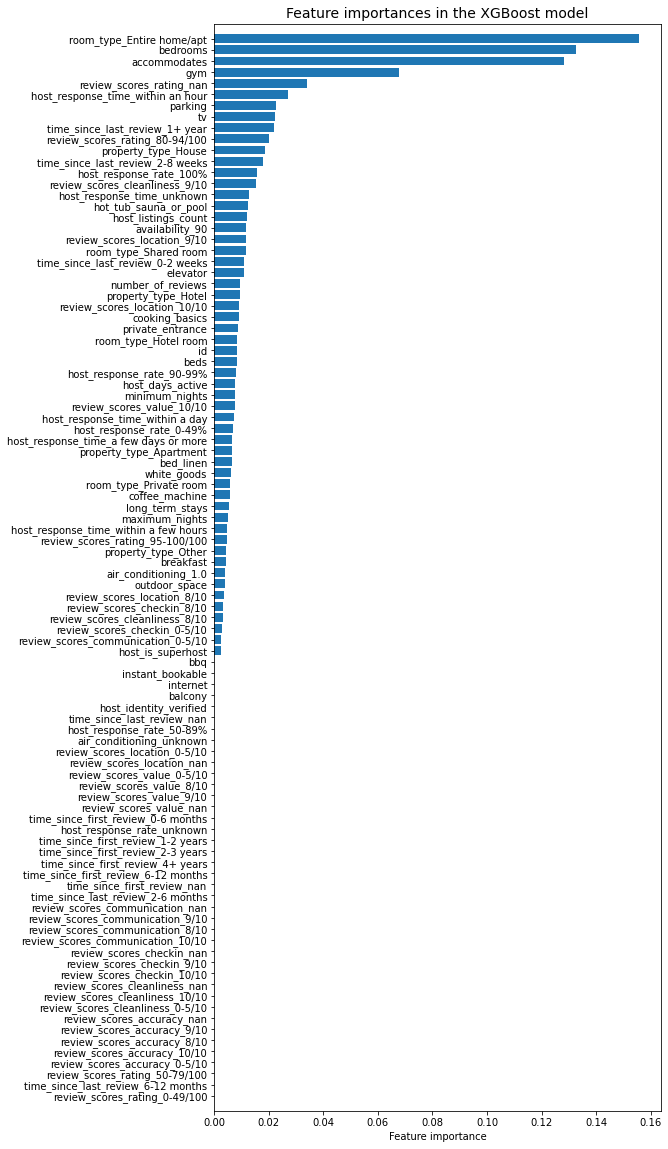

In [6]:
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [7]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12416     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 111,489
Trainable params: 111,489
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 1355573041906.5264 - mean_squared_error: 1355573041906.5264 - val_loss: 149961179136.0000 - val_mean_squared_error: 149961179136.0000
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 67433642307.3684 - mean_squared_error: 67433642307.3684 - val_loss: 3688971008.0000 - val_mean_squared_error: 3688971008.0000
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 8943047343.1579 - mean_squared_error: 8943047343.1579 - val_loss: 1934620800.0000 - val_mean_squared_error: 1934620800.0000
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 1003738273.6842 - mean_squared_error: 1003738273.6842 - val_loss: 53646916.0000 - val_mean_squared_error: 53646916.0000
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 64084365.4737 - mean_squared_error: 64084365.4737 - val_loss: 76779784.0000 - val_mean_squared_error: 76779784.0000
Epoch 6/100
1

In [10]:
trained_prediction = nn2.predict(X_train)
test_prediction = nn2.predict(X_test)
print("Training MSE:", round(mean_squared_error(y_train, trained_prediction),4))
print("Validation MSE:", round(mean_squared_error(y_test, test_prediction),4))
print("\nTraining r2:", round(r2_score(y_train, trained_prediction),4))
print("Validation r2:", round(r2_score(y_test, test_prediction),4))

Training MSE: 148867.4358
Validation MSE: 144622.0743

Training r2: -257589.7156
Validation r2: -269989.2692
